# Data preprocessing

In [39]:
#importing useful libraries
import pandas as pd
import numpy as np
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import make_scorer,f1_score
import matplotlib.pyplot as plt
from sklearn.utils import resample
import seaborn as sns
%matplotlib inline

In [40]:
df=pd.read_csv('compound quality.csv', sep=";")

In [42]:
df['quality'].value_counts()

6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: quality, dtype: int64

In [43]:
compute_class_weight(class_weight='balanced',classes=[3,4,5,6,7,8,9],y=df['quality'])

array([ 34.98571429,   4.29272568,   0.48024316,   0.31834135,
         0.79512987,   3.99836735, 139.94285714])

# Handling Imbalance Data

In [44]:
df3=df[df.quality==3]
df4=df[df.quality==4]
df5=df[df.quality==5]
df6=df[df.quality==6]
df7=df[df.quality==7]
df8=df[df.quality==8]
df9=df[df.quality==9]

df3=resample(df3,replace=True,n_samples=2198,random_state=50)
df4=resample(df4,replace=True,n_samples=2198,random_state=50)
df5=resample(df5,replace=True,n_samples=2198,random_state=50)
df7=resample(df7,replace=True,n_samples=2198,random_state=50)
df8=resample(df8,replace=True,n_samples=2198,random_state=50)
df9=resample(df9,replace=True,n_samples=2198,random_state=50)

df=pd.concat([df3,df4,df5,df6,df7,df8,df9])

In [45]:
print(df.shape)
df['quality'].value_counts()

(15386, 12)


7    2198
6    2198
5    2198
4    2198
3    2198
9    2198
8    2198
Name: quality, dtype: int64

In [46]:
compute_class_weight(class_weight='balanced',classes=[3,4,5,6,7,8,9],y=df['quality'])

array([1., 1., 1., 1., 1., 1., 1.])

# Splitting data into X and y

In [47]:
X=df.drop(columns=['quality'],axis=1)
Y=df['quality']

In [48]:
compute_class_weight(class_weight='balanced',classes=[3,4,5,6,7,8,9],y=Y)

array([1., 1., 1., 1., 1., 1., 1.])

# Scaling data using StandardScaler

In [49]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X=scaler.fit_transform(X)


# Splitting data into train and test 

In [50]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3 , random_state=100)

# KNN 

In [51]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5,weights='distance')
knn.fit(x_train,y_train)
print(knn.score(x_train, y_train))
print(knn.score(x_test, y_test))

f1=make_scorer(f1_score,average='macro')

1.0
0.9131282495667244


In [52]:
from sklearn.model_selection import GridSearchCV
nearest_neighbour=list(range(1,200,5))
param_grid={'n_neighbors':nearest_neighbour}
knn=KNeighborsClassifier(n_jobs=-1,weights='distance')

grid_search_knn=GridSearchCV(knn,param_grid,scoring=f1,cv=3,n_jobs=-1,verbose=1)
grid_search_knn.fit(x_train,y_train)

Fitting 3 folds for each of 40 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   18.5s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:  1.2min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
           weights='distance'),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'n_neighbors': [1, 6, 11, 16, 21, 26, 31, 36, 41, 46, 51, 56, 61, 66, 71, 76, 81, 86, 91, 96, 101, 106, 111, 116, 121, 126, 131, 136, 141, 146, 151, 156, 161, 166, 171, 176, 181, 186, 191, 196]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=make_scorer(f1_score, average=macro), verbose=1)

In [54]:
grid_search_knn.score(x_train,y_train)

1.0

In [55]:
grid_search_knn.score(x_test,y_test)

0.9198408395675408

In [56]:
print("Best score=", grid_search_knn.best_score_)
print("Best parameters=",grid_search_knn.best_params_)

Best score= 0.8840731106332844
Best parameters= {'n_neighbors': 1}


# Logistic Regression

In [57]:
#Using Logistic Regression Algorithm to the Training Set
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(penalty='l1',class_weight='balanced')
logreg.fit(x_train, y_train)

C:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l1', random_state=None,
          solver='warn', tol=0.0001, verbose=0, warm_start=False)

In [58]:
print("training set score: %f" % logreg.score(x_train, y_train))
print("test set score: %f" % logreg.score(x_test, y_test))

training set score: 0.493686
test set score: 0.493934


In [59]:
#LR with cross-validation
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

c=[0.5,1,5,10**1,25,10**2,625,10**3,10**4]

param_grid={'C':c}
            
logreg=LogisticRegression(n_jobs=-1,class_weight='balanced')



grid_search_logreg=GridSearchCV(logreg,param_grid,cv=3,scoring=make_scorer(f1_score,average='macro'),n_jobs=-1,verbose=1)
grid_search_logreg.fit(x_train,y_train)

Fitting 3 folds for each of 9 candidates, totalling 27 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  27 out of  27 | elapsed:    3.1s finished
C:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:1300: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=-1, penalty='l2', random_state=None,
          solver='warn', tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'C': [0.5, 1, 5, 10, 25, 100, 625, 1000, 10000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=make_scorer(f1_score, average=macro), verbose=1)

In [60]:
grid_search_logreg.score(x_train,y_train)

0.47393483438976164

In [61]:
grid_search_logreg.score(x_test,y_test)

0.47101022070465

In [37]:
#Data is non linearly seperable since LR is not doing good job in predicting the data

In [62]:
print("Best score=", grid_search_logreg.best_score_)
print("Best parameters=",grid_search_logreg.best_params_)

Best score= 0.4736713624759272
Best parameters= {'C': 625}


# Decision Tree

In [68]:
from sklearn.tree import DecisionTreeClassifier
tree=DecisionTreeClassifier(class_weight='balanced')
tree.fit(x_train,y_train)

print(tree.score(x_train,y_train))
print(tree.score(x_test,y_test))

1.0
0.9157279029462738


In [69]:
from sklearn.model_selection import GridSearchCV
depth=list(range(15,30))
leaf=list(range(500,1500,50))

param_grid={'max_depth':depth,'max_leaf_nodes':leaf}

tree_grid_cv=DecisionTreeClassifier(class_weight='balanced')

grid_search=GridSearchCV(tree_grid_cv,param_grid,scoring=make_scorer(f1_score,average='macro'),cv=5,n_jobs=-1,verbose=1)

grid_search.fit(x_train,y_train)

Fitting 5 folds for each of 300 candidates, totalling 1500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 144 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 744 tasks      | elapsed:   11.1s
[Parallel(n_jobs=-1)]: Done 1500 out of 1500 | elapsed:   21.4s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight='balanced', criterion='gini',
            max_depth=None, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'max_depth': [15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29], 'max_leaf_nodes': [500, 550, 600, 650, 700, 750, 800, 850, 900, 950, 1000, 1050, 1100, 1150, 1200, 1250, 1300, 1350, 1400, 1450]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=make_scorer(f1_score, average=macro), verbose=1)

In [70]:
print("Test Accuracy=",grid_search.score(x_train,y_train))

Test Accuracy= 0.995381066898074


In [71]:
print("Test Accuracy=",grid_search.score(x_test,y_test))

Test Accuracy= 0.9045523814723104


In [72]:
print("Best score=", grid_search.best_score_)
print("Best parameters=",grid_search.best_params_)

Best score= 0.8933010438926936
Best parameters= {'max_depth': 26, 'max_leaf_nodes': 1050}


# RF

In [76]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(class_weight='balanced')
rf.fit(x_train,y_train)

print(rf.score(x_train,y_train))
print(rf.score(x_test,y_test))

0.9977715877437325
0.9263431542461005


C:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [77]:
from sklearn.model_selection import GridSearchCV
n_trees=list(range(50,150,20))
depth=list(range(16,25))
param_grid={'max_depth':depth,'n_estimators':n_trees}
rf_grid=RandomForestClassifier(n_jobs=-1,class_weight='balanced')

grid_search_rf=GridSearchCV(rf_grid,param_grid,cv=5,scoring=make_scorer(f1_score,average='macro'),n_jobs=-1,verbose=1)
grid_search_rf.fit(x_train,y_train)

Fitting 5 folds for each of 45 candidates, totalling 225 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   11.0s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   53.6s
[Parallel(n_jobs=-1)]: Done 225 out of 225 | elapsed:  1.1min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators='warn', n_jobs=-1, oob_score=False,
            random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'max_depth': [16, 17, 18, 19, 20, 21, 22, 23, 24], 'n_estimators': [50, 70, 90, 110, 130]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=make_scorer(f1_score, average=macro), verbose=1)

In [83]:
grid_search_rf.score(x_train,y_train)

0.9994475114338724

In [84]:
grid_search_rf.score(x_test,y_test)

0.9318436603067958

In [85]:
print("Best score=", grid_search_rf.best_score_)
print("Best parameters=",grid_search_rf.best_params_)

Best score= 0.9194525028426783
Best parameters= {'max_depth': 20, 'n_estimators': 130}


# Feature Importance

In [89]:
# X=pd.DataFrame(X,index=X[:,:])

No handles with labels found to put in legend.


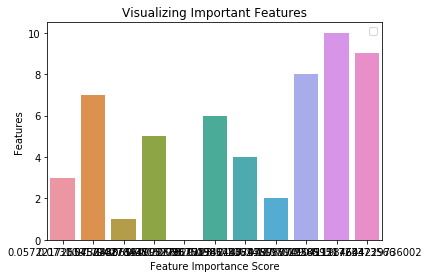

In [90]:
feature_imp = pd.Series(rf.feature_importances_,index=X.columns).sort_values(ascending=False)

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

In [92]:
best_score = 0
n_trees = list(range(10,200, 10))

for trees in n_trees:
    rf_trees = RandomForestClassifier(n_estimators = trees, n_jobs = -1)
    rf_trees.fit(x_train, y_train)
    # Evaluate the score
    
    score = rf_trees.score(x_test, y_test)
    
    print("Trees =", trees, ": Score = ", score)
    if score > best_score:
        best_score = score
        best_parameters = trees

print("Best score = ", best_score)
print("No of Trees = ", best_parameters)
   

Trees = 10 : Score =  0.9226603119584056
Trees = 20 : Score =  0.9315424610051993
Trees = 30 : Score =  0.9410745233968805
Trees = 40 : Score =  0.9376083188908145
Trees = 50 : Score =  0.9371750433275563
Trees = 60 : Score =  0.9386915077989602
Trees = 70 : Score =  0.9393414211438474
Trees = 80 : Score =  0.9386915077989602
Trees = 90 : Score =  0.9382582322357019
Trees = 100 : Score =  0.9399913344887348
Trees = 110 : Score =  0.936525129982669
Trees = 120 : Score =  0.9404246100519931
Trees = 130 : Score =  0.9395580589254766
Trees = 140 : Score =  0.9391247833622184
Trees = 150 : Score =  0.9395580589254766
Trees = 160 : Score =  0.9402079722703639
Trees = 170 : Score =  0.9402079722703639
Trees = 180 : Score =  0.9408578856152513
Trees = 190 : Score =  0.9378249566724437
Best score =  0.9410745233968805
No of Trees =  30


No handles with labels found to put in legend.


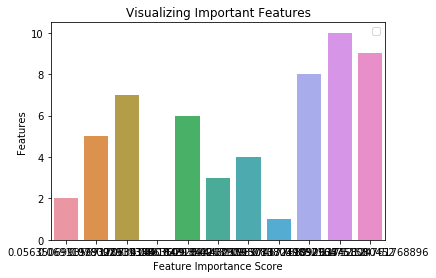

In [93]:
## Now let's see the feature importances with the number of trees = best parameters
rf_trees = RandomForestClassifier(n_estimators = best_parameters, n_jobs = -1)
rf_trees.fit(x_train, y_train)
## Feature Importance
feature_imp = pd.Series(rf_trees.feature_importances_,index=X.columns).sort_values(ascending=False)

sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()